<a href="https://colab.research.google.com/github/cSimancasc/Notes-on-Tensor-Flow/blob/main/02_tensorflow_neuralregresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

##**Introduction to regresion models**


*   Python simple lineal regression
*   Modelling with Tensorflow
    *   MAE-MeanAsoluteError
    *   SGD-StochasticGradientDescent
    *   ReLU-Rectified Linear Unit
    *   Adam-Adapative Moment Estimation
*   Improving a model with TF



We start by ploting a simple regression on python for a pair of two random sets.

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

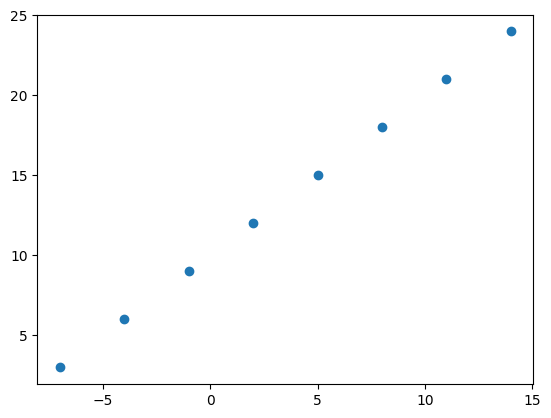

In [ ]:
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
Y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
plt.scatter(X,Y)
X=tf.constant(X)
Y=tf.constant(Y)
X,Y

When modelling with TensorFlow we follow these steps:


1.   Creation: Defying the structure from input,
hidden and output layers.
2.   Compiling: Define the loss functions and evaluating metric
3.    Fitting: Letting the model look up for the interanal data correlations.


In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1),Y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step - loss: 16.9680 - mae: 16.9680
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 16.6868 - mae: 16.6868
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 16.4055 - mae: 16.4055
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 16.1243 - mae: 16.1243
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 15.8430 - mae: 15.8430


In the simple example above, we use Sequential, which groups a linear stack of layers into a model. Dense layers refer to the fully connected layers (including hidden layers) between the input and output, where their main property is the number of units (neurons). In this case, since we have a 1D input and are trying to predict a 1D output, we only use one unit in the last layer.

When compiling the model, we must define a loss function, which measures how far our predictions are from the true data values. In this case, we use the mean absolute error (MAE), defined as:

$$MAE=\dfrac{1}{n}\sum_{i=0}^{n} |y_{i}-\hat y_{i}|
$$
Where $\hat y$ stands for the training real data.

Optimizers tell the neural network how to update its parameters to minimize the loss function. "SGD" stands for stochastic gradient descent, which updates the parameters iteratively as follows:
$$y_{n}=y_{n-1}-\eta\nabla MAE(y_{n-1})$$

This process can be seen as descending along the loss surface (computed from the difference between predictions and real data) until reaching a minimum.

Metrics measure how well the model performs during training. Using "mae" as a metric corresponds to the classic $||.||_{1}$ norm.

When fitting the model, epochs are the number of times the program iterates over the entire training dataset.
> TF old versions when fitting no longer autmatically upscales inputs from shape (batch_size,) to (batch_size,1). These result in a shape erro2, to fix it we add an extra dimension to X on the last axis turning it to 1D to 2D

Finally, once the model is trained, we can use it to make predictions on new values.


In [ ]:
y_pred=model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[-9.1584]], dtype=float32)

Wich got a huge error(we know it by simple lineal correltions with the input an output data) as we could have intuitly think form the training metrics.

We can improve our model by altering the steps we took to create it. While creating que could have add more layers increasionf the number of neurons on hidden layers or its activation function. In the other hand the optimaization function or its learning rate may be change during the compilling process as well as the epoch number for longer data training while adding more examples to learn.

We include most of these changes in the folowing model

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),  # One 100 neuron layer with relu activation function
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #Adam optimizer with 10% learning rate
              metrics=["mae"])
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100) #Longer training time

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 15.7332 - mae: 15.7332   
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 14.8812 - mae: 14.8812
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 14.0432 - mae: 14.0432
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 13.2284 - mae: 13.2284
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 12.4279 - mae: 12.4279
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.8131 - mae: 11.8131
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11.2387 - mae: 11.2387
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 10.6626 - mae: 10.6626
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 10.0787 - mae: 10.0787
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.4781 - mae: 9.4781
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.8637 - mae: 8.8637
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 8.2310 - mae: 8.2310
Epoch 13/100
1/1 ━━━━━━━━━━━━━

When adding a hidden layer, we must specify an activation function. Its role is to calculate the output of a node based on its inputs and weights. ReLU (Rectified Linear Unit) is one of the most common activation functions and is defined as:

$$x=\left\lbrace\array{
0&,x\leq 0\\
x&,x>0\\
}
\right\rbrace$$

We also change the optimization method to Adam (Adaptive Moment Estimation), which offers several advantages, such as adaptability, momentum, and computational efficiency. Adam can be seen as a combination of two methods:
* Momentum($m_{t}$): Speeds up training  acelerating gradients($g_{t}$) in the right direction by adding a fraction on the previous one($m_{t-1}$). We define $β_1$ as the decay rate for momentum, ussually set as 0.9, giving hight weighting for the most recent gradients.

$$  m_{t}=\beta_{1}m_{t-1}+(1-\beta_{1})*g_{t}$$


* RMSProp(Root Mean Square Propagation-$v_{t}$): Looks at the steepness of the error surface for each parameter to update the learning rate adpativily,  RMSProp is based on controlling overshooting by modulating step size. The equations beahves similar being a wighted moving average of varince gradientes(squared gradients) where we define $\beta_{2}$ as the decar rate for variance gradient, tipically set on $0.999$

$$v_{t}=\beta_{2}v_{t-1}+(1-\beta_{2})*g_{t}^{2}$$

Finally, both values are normalized, and we introduce $ɛ$
ε (a small constant, e.g. $10^{−8}$) to prevent division by zero:

$$\array{
  \hat{m}_{t}=m_{t}/(1-\beta_{1}^{t})\\
  \hat{v}_{t}=v_{t}/(1-\beta_{2}^{t})\\
  \theta=\theta-(\alpha\hat{m}_{t}/\sqrt{(\hat{v}_{t}+\varepsilon)})\\
}$$


**The learning rate $\alpha$ is divided by the square foroot of the squared gradients. This means that when the variance of gradients is hight we reduce the learning rate as we want to be more conservative, and when is low we increase the learning rate thus going faster towards the optima.**

In [ ]:
y_pred=model.predict(tf.constant([17,0]))
y_pred,X,Y

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


(array([[27.507174],
        [10.531162]], dtype=float32),
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

The most important parameter for optimization is the learning rate. As we can see from the metrics, both the loss and the error decrease rapidly from the initial model.

##**Evaluating and Inspecting Models**

*   Working sets
*   Visualizing model insights
    *   model.summary()
    *   verbose
    *   model_plot()
*   Visualizing model predictions
*   Evaluation metrics
    *   model.evaluate()
    *   MAE(Mean Absolute Error)
    *   MSE(Mean Squared Error)
    *   L_{\delta}(Huber loss)


We start by creating a random set of values and defining a relationship with a corresponding y value. We must then define three working sets:
*   Training set: The model learns from this data. It typically makes up $70-80 \%$ of the total data available.
*   Validation set:The model is tuned on this data(e.g during hyperparameter adjustment). It usually represents  $10-15\%$ of the total data.
*   Test set: The model is evaluated on this data to asess what it has learned. This set tipically accounts for  $10-15\%$  of the total data.


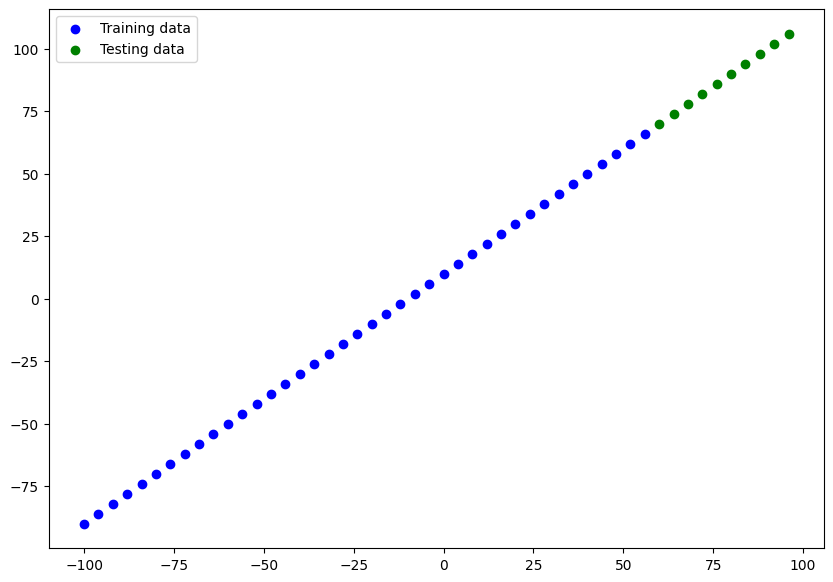

In [2]:
X=tf.range(-100,100,4)
y=X+10
X_train=X[:40]
y_train=y[:40]
X_test=X[40:]
y_test=y[40:]
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training data")
plt.scatter(X_test,y_test,c="g",label="Testing data")
plt.legend();

Now that we have split our data into training and test sets, let’s build a simple regression model.

In [3]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1, name="output_layer")
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


When calling model.summary() we get a printed overview:
*   Total params: The total number of parameters in the model.
*   Trainable params: Parameters that the model can update during training.
*   Non-trainable params: Parameters that remain fixed during training (this typically happens when importing pre-learned weights from another model during transfer learning).

The "none" in the shpae means it does not have a predefined number. It can be the batch size you use during training. The model will infer the shpae from the context of the layers.

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 We now fit our model. The verbosse parameter controls how the training progress is displayed for each epoch.  When verbose=0 no output, when verbose=1 displays an  animated progress bar and when verbose=2 prints one line per epoch showing the metric.

In [5]:
model.fit(X_train,y_train,epochs=100, verbose=0)

Let’s review our summary now that the model has been fit. Two new parameters appear (optimizer params). Methods such as Adam keep extra variables internally (e.g., moving averages of gradients), and these are stored as optimizer parameters.

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Another way to visualize our model is by using plot_model from tensorflow.keras.utils, which provides a graphical schema of the network, specifying the neurons in each layer and their connections.

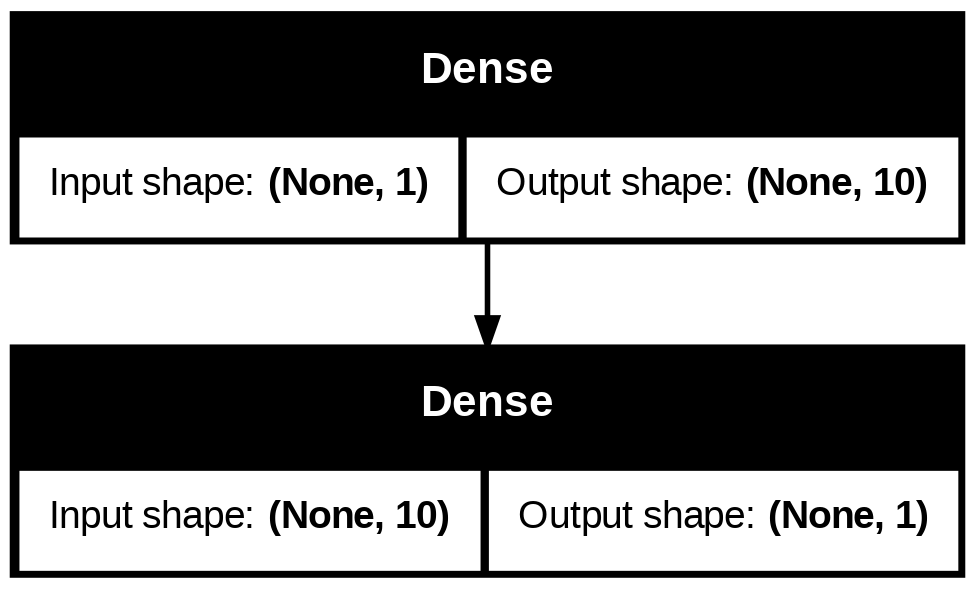

In [7]:
plot_model(model=model,show_shapes=True)

To visualize predictions, it is a good idea to plot them against the ground truth labels.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


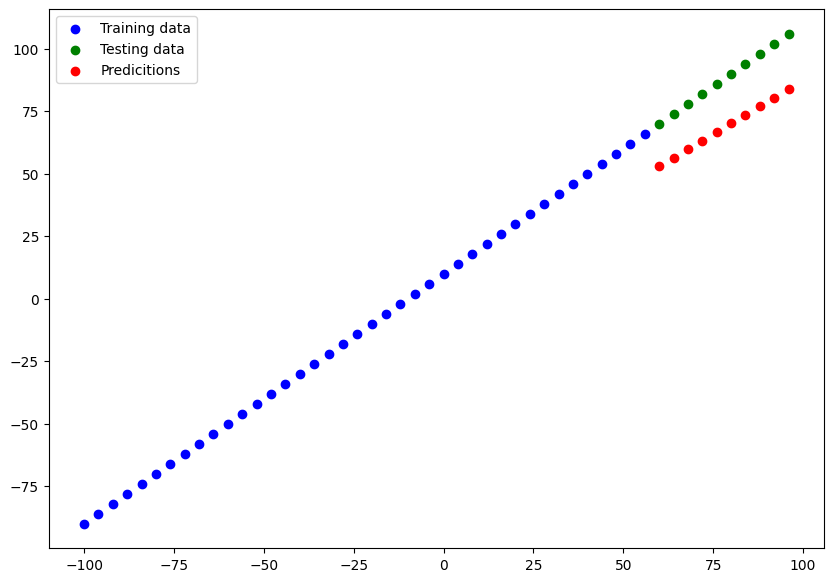

In [8]:
y_pred=model.predict(X_test)
plt.figure(figsize=(10,7))
def plot_predicttions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=y_pred):
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  plt.scatter(test_data,predictions,c="r",label="Predicitions")
  plt.legend();
plot_predicttions()

Depending on the problem we are working on, different evaluation metrics can be used to assess the model’s performance. We can get a general overview using model.evaluate(), which computes the metrics that were specified during training and fitting.

In [9]:
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 19.5651 - mae: 19.5651


[19.565126419067383, 19.565126419067383]

Since we’re working on a regression problem, two of the main metrics are MAE (Mean Absolute Error) and MSE (Mean Squared Error). While MAE treats all errors equally, MSE gives larger weight to bigger errors.

$$MAE=\dfrac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})\hspace{1cm}MSE=\dfrac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2$$

As we can imagine, MSE corresponds to the $||.||_{2}$ metric. A combination of both metrics is the Huber loss, which is less sensitive to outliers:

$$L_{δ}(y,\hat{y})=\left\lbrace
\array{
\dfrac{1}{2}(y_{i}-\hat{y_{i}})^2&    |y_{i}-\hat{y}_{i}\leq \delta|\\
\delta(|y_{i}-\hat{y_{i}}|-\frac{\delta}{2})&   r.o.c\\
}\right\rbrace$$

For small residuals, the function behaves quadratically, while for large residuals it behaves linearly, reducing the influence of outliers.

In [10]:
mae=tf.keras.metrics.MeanAbsoluteError()
mae.update_state(y_test,y_pred)
mae.result()

<tf.Tensor: shape=(), dtype=float32, numpy=19.565126419067383>

In [11]:
mse=tf.keras.metrics.MeanSquaredError()
mse.update_state(y_test,y_pred)
mse.result()

<tf.Tensor: shape=(), dtype=float32, numpy=385.47552490234375>

## **Comparing models**


*   Comparing three model experiments
*   Tracking models
*   LargerExample
    *   Imported raw datasets
    *   train_test_split
    *   loss and mae metrics
    *   history plotting
*   EarlyStoppingCallack
*   Normalisation
    *   Scale- MinMaxScaller
    *   Standardization-StandardScaler



We now run a series of experiments, applying everything we have studied, to see how we can improve our regression model:
*   Model 1: Increase the training time.
*   Model 2: Add a second hidden layer.
*   Model 3: Keep the previous structure but increase the training time.



In [135]:
tf.random.set_seed(42)
X=tf.range(-100,100,4)
y=X+10
X_train=X[:40]
y_train=y[:40]
X_test=X[40:]
y_test=y[40:]

#Model 1 where we increase training time
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_1.fit(tf.expand_dims(X_train,-1),y_train,epochs=100,verbose=0)
y_pred_1=model_1.predict(X_test)


#Model 2 where we add a second hidden layer
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_2.fit(tf.expand_dims(X_train,-1),y_train,epochs=100,verbose=0)
y_pred_2=model_2.predict(X_test)

#Model 3 where we increase training time in model 2 structure
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_3.fit(tf.expand_dims(X_train,-1), y_train, epochs=500,verbose=0)
y_pred_3=model_3.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


We plot our results to get an initial idea of how well our models perform. It is easy to see that adding more layers or training for longer does not necessarily correlate with better results. To find the best parameters and structures, we need to run several experiments for each model.

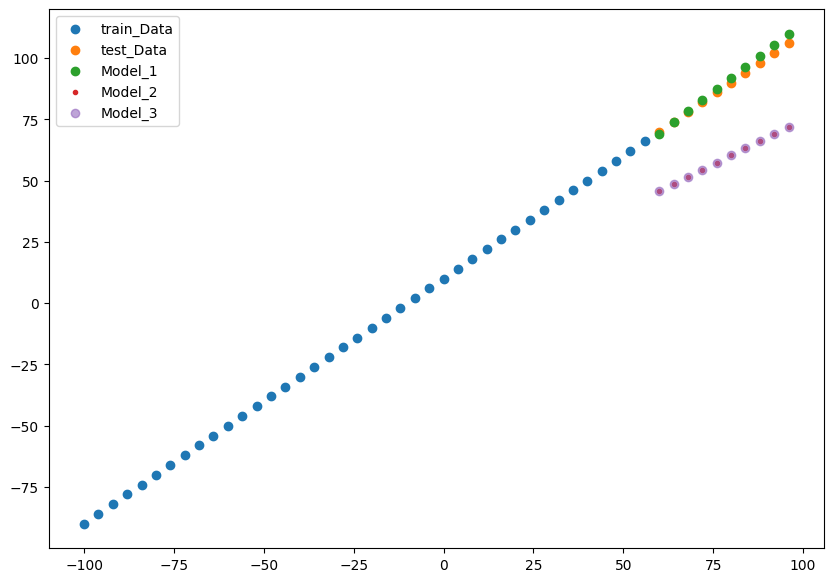

In [136]:
#We plot the solutions
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,label="train_Data")
plt.scatter(X_test,y_test,label="test_Data")
plt.scatter(X_test,y_pred_1,label="Model_1")
plt.scatter(X_test,y_pred_2,label="Model_2",marker=".")
plt.scatter(X_test,y_pred_2,label="Model_3",alpha=0.6)
plt.legend()

We can provide a more precise justification of the above by studying the evaluation metrics of each model.

In [137]:
#Model_1 metrics
mae_1=tf.keras.metrics.MeanAbsoluteError()
mae_1.update_state(y_test,y_pred_1)
mse_1=tf.keras.metrics.MeanSquaredError()
mse_1.update_state(y_test,y_pred_1)
mae_1.result(),mse.result()

#Model_2 metrics
mae_2=tf.keras.metrics.MeanAbsoluteError()
mae_2.update_state(y_test,y_pred_2)
mse_2=tf.keras.metrics.MeanSquaredError()
mse_2.update_state(y_test,y_pred_2)
mae_2.result(),mse.result()

#Model_3 metrics
mae_3=tf.keras.metrics.MeanAbsoluteError()
mae_3.update_state(y_test,y_pred_3)
mse_3=tf.keras.metrics.MeanSquaredError()
mse_3.update_state(y_test,y_pred_3)
mae_3.result(),mse.result()

(<tf.Tensor: shape=(), dtype=float32, numpy=45.50938034057617>,
 <tf.Tensor: shape=(), dtype=float32, numpy=385.47552490234375>)

In [138]:
model_results=[["Model_1",mae_1.result(),mse_1.result()],
               ["Model_2",mae_2.result(),mse_2.result()],
               ["Model_3",mae_3.result(),mse_3.result()]]
results=pd.DataFrame(model_results,columns=["Model","mae","mse"])
results

,Model,mae,mse
0,Model_1,"tf.Tensor(1.7838295, shape=(), dtype=float32)","tf.Tensor(4.747609, shape=(), dtype=float32)"
1,Model_2,"tf.Tensor(29.169916, shape=(), dtype=float32)","tf.Tensor(860.30194, shape=(), dtype=float32)"
2,Model_3,"tf.Tensor(45.50938, shape=(), dtype=float32)","tf.Tensor(2108.467, shape=(), dtype=float32)"


One really good habit in machine learning modeling is to track the results of your experiments, since running many experiments can quickly become tedious.

*  TensorBoard: A component of the TensorFlow library that helps track modeling experiments. It includes dynamic charts for loss and metrics, as well as histograms and distributions showing how tensors evolve over time.

*  Weights & Biases (W&B): A powerful external tool for tracking all kinds of machine learning experiments, offering experiment logging, visualization, collaboration, and version control for models and datasets.

We now study a larger model. To do this, we first introduce a bigger and more complex dataset, which can be found on Kaggle.
Kaggle datasets can be imported directly into Colab by accessing their raw web format and loading them into a Pandas DataFrame:

In [139]:
insurance=pd.read_csv("https://raw.githubusercontent.com/SahilChachra/Medical-Cost-Prediction/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


When a dataset contains mixed float and string elements (e.g., numerical and categorical features), the categorical features can be easily handled using one-hot encoding.

In [140]:
insurance_one_hot=pd.get_dummies(insurance,dtype=float)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


We now set both X and y variables, being "charges" the one we are studing.  We as well use sklearn packeage to randomly divided training and test sets.

In [154]:
#Ser X and y variables
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

#Divide training and test sets randomly
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

We now build a simple regression model and evaluate it on our test set.

In [142]:
tf.random.set_seed(42)

#Define model structure with two Dense layers
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile and fiting the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
insurance_model.fit(tf.expand_dims(X_train,-1),y_train,epochs=100,verbose=0)

#Evaluate on test set
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8938.4453 - mae: 8938.4453  


[8736.033203125, 8736.033203125]

It looks like our model isn’t performing well, so let’s try to improve it by: adding an extra hidden layer, changing the optimizer and increasing the training time.





9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8938.4453 - mae: 8938.4453 


[8736.033203125, 8736.033203125]

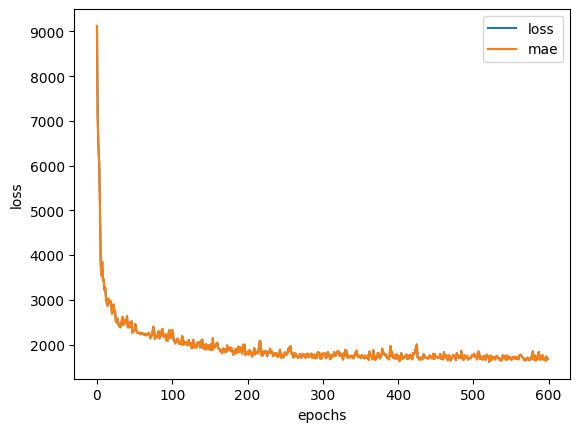

In [143]:
tf.random.set_seed(42)

#Define model structure with two Dense layers
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(11,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(1)
])

#Compile and fiting the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
                          metrics=["mae"])
history=insurance_model_2.fit(X_train,y_train,epochs=600,verbose=0)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#Evaluate on test set
insurance_model.evaluate(X_test,y_test)

The history object contains the values of the loss and metrics while the model is being trained, and we can plot it. This is useful for understanding how well the model is learning the underlying patterns during training.

*We also add a Flatten layer. When data with multiple dimensions is fed into the model, Flatten transforms the data tensor into a 1D vector, which is the shape we need for the output of a regression model. This can be easily seen in the model summary, where the last layer outputs (None, 1), which corresponds to a 1D output per sample. When plotting the results, we can use tf.squeeze() to remove the extra dimension, so the predictions have the same shape as y_test.*

In [144]:
insurance_model_2.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 200)            │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,201 (32.04 KB)

 Trainable params: 2,733 (10.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,468 (21.36 KB)

Lastly, we plot the distribution of the test set against the model’s predictions. This allows us to visually compare how close the predicted values are to the ground truth and assess the quality of the regression model.

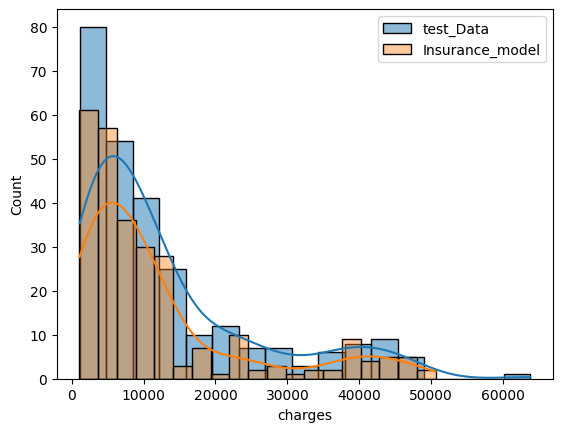

In [145]:
sns.histplot(y_test,kde="True",label="test_Data")
sns.histplot(tf.squeeze(insurance_model_2(X_test)),kde="True",label="Insurance_model",alpha=0.4)
plt.legend()

We could also ask ourselves: how long should you train for?
The answer depends on the model and its parameters, but TensorFlow offers a useful solution called EarlyStoppingCallback.

Early stopping halts training once a monitored metric has stopped improving.
For example, if the goal of training is to minimize the loss, then the monitored metric would be "loss", and the mode would be "min".

During training, at the end of every epoch, the loop checks whether the loss is still decreasing, considering the values of min_delta (minimum change to qualify as an improvement) and patience (number of epochs to wait for improvement). Once it detects that the loss has stopped decreasing, model.stop_training is set to True, and the training terminates.

The monitored metric must be present in the logs dictionary, which means it should be included in the arguments passed to model.compile() (e.g., loss or metrics).

Normalization is a technique often applied as part of data preparation for machine learning.
The goal is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the range of values.

This is particularly important in neural networks, since features with larger numerical ranges may dominate the learning process, leading to slower convergence or suboptimal results.

To illustrate this, we can compare the distribution of two features from X and the target variable y before normalization:

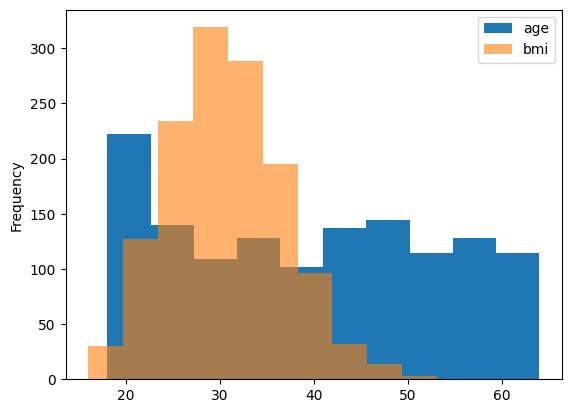

In [146]:

X["age"].plot(kind="hist",label="age")
X["bmi"].plot(kind="hist",label="bmi",alpha=0.6)
plt.legend()

We will work with to normalizations standars.
*   Scale(MinMaxScaler): Converts all values to a renge between 0 and 1 while preserving the original. Commonly used as the default scaler in neural networks since many activation functions perform better with bounded inputs.
$$x_{i}\prime=\dfrac{x_{i}-min(x)}{max(x)-min(x)}$$

*   Standardizations(StandarScaler): Removes the mean and divides each value by the standard deviation. Transform features to have aprproximately a normal distribution(mean=0, variance=1) and reduces the effect of large outliers compared to MinMax scaling.
$$x_{i}\prime=\dfrac{x_{i}-\bar{x}}{\sigma}$$
Where $\bar{x}$ is the average and $σ$ is its standard deviation.

To normalize our data, we first create a ColumnTransformer, which works as a pipeline that applies the specified transformations (scaling for numerical features and one-hot encoding for categorical ones). We then fit it on the training set and transform both the training and test datasets accordingly.


In [147]:
insurance=pd.read_csv("https://raw.githubusercontent.com/SahilChachra/Medical-Cost-Prediction/refs/heads/master/insurance.csv")
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),   #Normalise the specify columns
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])    #OneHot Encode the specify collumns
)
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# Now that we have split our set we need to fit the column transformer to our training data
ct.fit(X_train)
# Transform training and test data with normlization and OneHotEnconder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)


Now, let’s visualize our normalized data. Plotting the transformed features allows us to compare their distributions before and after scaling, and to confirm that numerical values are within the expected range (e.g., between 0 and 1 when using MinMaxScaler).

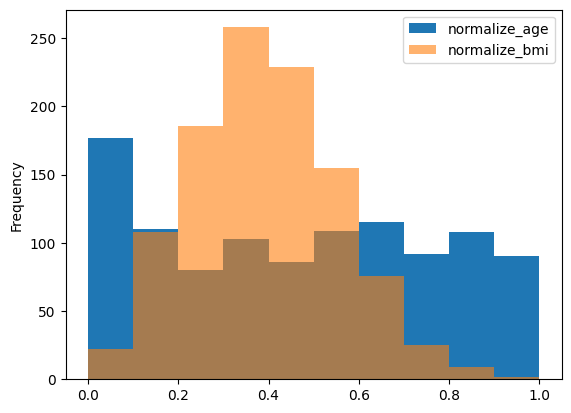

In [148]:
#Create a datFrame for normalize data
X_train_normal_df=pd.DataFrame(X_train_normal,columns=["age","bmi","children","sex_female","sex_male","smoker_no","smoker_yes","region_northeast","region_northwest","region_southeast","region_southwest"])
X_train_normal_df["age"].plot(kind="hist",label="normalize_age")
X_train_normal_df["bmi"].plot(kind="hist",label="normalize_bmi",alpha=0.6)
plt.legend()

Now that we have normalized our data lets build a neural network model and see how it goes.

In [153]:
tf.random.set_seed(42)
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(11,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(1)

])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(0.05),
                          metrics=["mae"])
insurance_model_3.fit(X_train_normal, y_train,epochs=600,verbose=0)

Just by normalising our data we considerably reduce mae and loss, lets visualize it

In [156]:
insurance_model_3.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1866.5426 - mae: 1866.5426  


[1831.87353515625, 1831.87353515625]

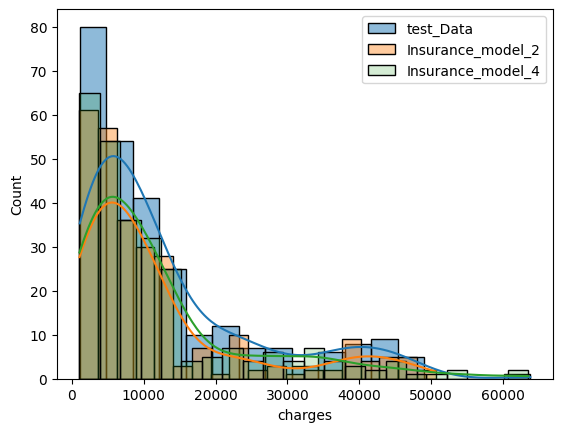

In [155]:
sns.histplot(y_test,kde=True,label="test_Data")
sns.histplot(tf.squeeze(insurance_model_2(X_test)),kde=True,label="Insurance_model_2",alpha=0.4)
sns.histplot(tf.squeeze(insurance_model_3(X_test_normal)),kde=True,label="Insurance_model_4",alpha=0.2)
plt.legend()

## **Model Storage and Reuse**
*   Saving models
*   Loading models
*   Download a model

Saving our models allows us to use them outside Google Colab (or wherever they were trained), such as in a web application or a mobile app. In TensorFlow, there are two main formats we can use: SavedModel format and HDF5 format.

The comand model.save("location/model_name.format") saves the complete model, including its architecture, weights, and optimizer state. This is useful because it allows you to resume training from where you left off or directly deploy the model.

In [ ]:
model_2.save("model_2.keras")

HDF5 stands for Hierarchical Data Format, a set of file formats designed to store and organize large amounts of data. TensorFlow allows us to save our models in this format by simply adding the .h5 extension when calling the save() method

In [ ]:
model_2.save("model_2.h5")

Now we load the saved models back and compare their predictions with the ones we already studied.
When loading models, the path can be found in the file explorer (the folder icon on the left in TensorFlow/Colab), where all saved models are stored.

In [ ]:
loaded_SavedModel_format=tf.keras.models.load_model("model_2.keras")
loaded_SavedModel_format.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_2_preds=model_2.predict(X_test)
loaded_SavedModel_format_pred=loaded_SavedModel_format.predict(X_test)
model_2_preds==loaded_SavedModel_format_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

For the HDF5 format, we proceed as follows:

In [ ]:
loaded_h5_model=tf.keras.models.load_model("model_2.h5")
loaded_h5_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_2_preds=model_2.predict(X_test)
loaded_h5_model_preds=loaded_h5_model.predict(X_test)
model_2_preds==loaded_h5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

When downloading our files from Google Colab, there are several options:
*   Download manually: From the Files tab (the folder icon on the left), right-click on the file and select Download.
*   Download via code: Use
*   Save to Google Drive: Mount Google Drive and copy the file there.

This way, your trained models can be safely stored and used outside Colab.

In [ ]:
from google.colab import files
files.download("/content/model_2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp /content/model_2.h5 /content/drive/MyDrive/tensorflow_course

cp: cannot create regular file '/content/drive/MyDrive/tensorflow_course': No such file or directory
